In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from SinglePushout import SinglePushout
from double_pushout import double_pushout

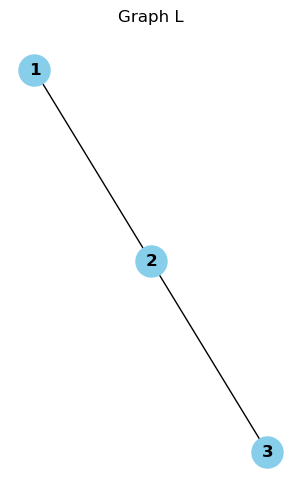

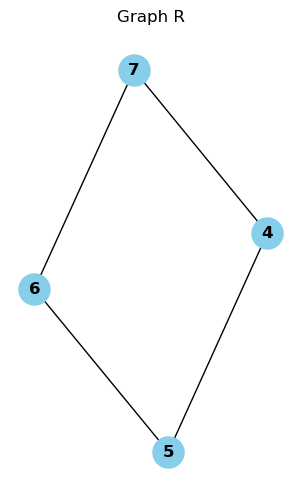

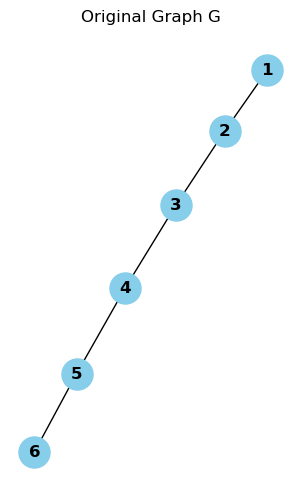

In [15]:
# Create the left graph (L)
L = nx.Graph()
L.add_edges_from([(1, 2), (2, 3)])

# Create the right graph (R)
R = nx.Graph()
R.add_edges_from([(4, 5), (5, 6), (6, 7), (4, 7)])

# Create the context graph (K) - part of the target graph that stays unchanged
K = nx.Graph()
K.add_edges_from([(2, 3)])

# Create the target graph (G)
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)])

# # Apply Double Pushout (DPO)
# result_graph = double_pushout(L, R, G, K)

# Plot the original graph L
plt.figure(figsize=(8, 6))
plt.subplot(121)
nx.draw(L, with_labels=True, node_color='skyblue', font_weight='bold', node_size=500, font_size=12)
plt.title("Graph L")

# Plot the original graph R
plt.figure(figsize=(8, 6))
plt.subplot(121)
nx.draw(R, with_labels=True, node_color='skyblue', font_weight='bold', node_size=500, font_size=12)
plt.title("Graph R")

# Plot the original graph G
plt.figure(figsize=(8, 6))
plt.subplot(121)
nx.draw(G, with_labels=True, node_color='skyblue', font_weight='bold', node_size=500, font_size=12)
plt.title("Original Graph G")

# # Plot the transformed graph result_graph
# plt.subplot(122)
# nx.draw(result_graph, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=500, font_size=12)
# plt.title("Transformed Graph (after DPO)")

plt.show()


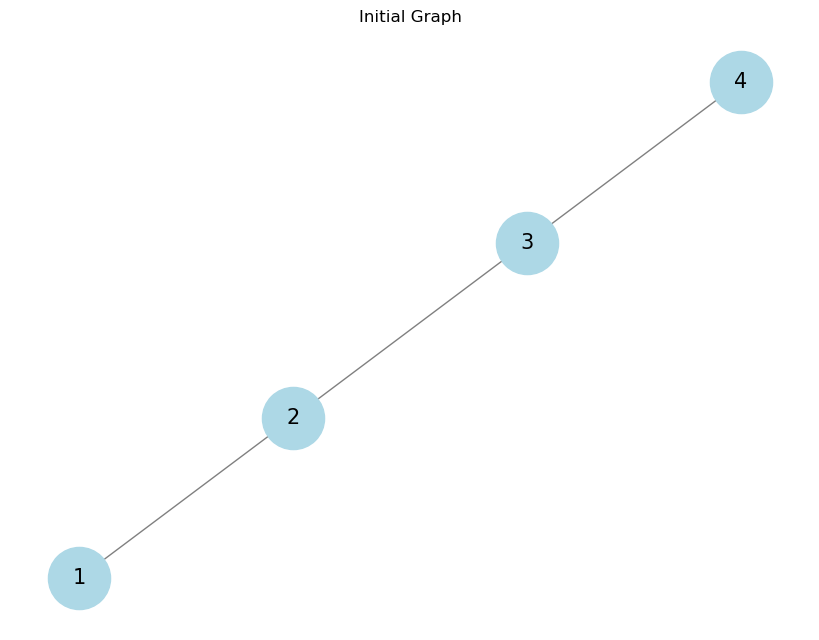

No matching subgraph found.


In [9]:
# Step 1: Create the initial graph G
def create_initial_graph():
    """
    Create an initial graph G with nodes and edges.
    """
    G = nx.Graph()
    G.add_nodes_from([1, 2, 3, 4])
    G.add_edges_from([(1, 2), (2, 3), (3, 4)])
    return G

# Step 2: Define the Rule (LHS and RHS)
def create_rule():
    """
    Define the rewriting rule with left-hand side (LHS) and right-hand side (RHS).
    LHS: a graph with nodes [2, 3] and edge (2, 3)
    RHS: a graph with nodes [2, 4] and edge (2, 4)
    """
    # LHS: Left-Hand Side
    LHS = nx.Graph()
    LHS.add_nodes_from([2, 3])
    LHS.add_edge(2, 3)
    
    # RHS: Right-Hand Side
    RHS = nx.Graph()
    RHS.add_nodes_from([2, 4])
    RHS.add_edge(2, 4)
    
    return LHS, RHS

# Step 3: Find the matching subgraph in G
def find_matching_subgraph(G, LHS):
    """
    Find a matching subgraph in G that matches the LHS of the rule.
    Returns the matched nodes and edges.
    """
    for subgraph in nx.connected_components(G):
        subgraph_nodes = list(subgraph)
        # Look for a matching subgraph of LHS size
        if set(subgraph_nodes) == set(LHS.nodes()):
            # Check if edges match
            edges_in_subgraph = list(G.subgraph(subgraph_nodes).edges())
            if set(LHS.edges()) == set(edges_in_subgraph):
                return subgraph_nodes, edges_in_subgraph
    return None, None

# Step 4: Apply Double Pushout Transformation
def apply_double_pushout(G, LHS, RHS, match_nodes, match_edges):
    """
    Apply the Double Pushout transformation by:
    1. Removing the matched LHS from G.
    2. Adding the RHS to the graph G.
    """
    # Remove the matched LHS from G
    G.remove_nodes_from(match_nodes)
    
    # Add the RHS into G
    G.add_nodes_from(RHS.nodes())
    G.add_edges_from(RHS.edges())
    
    return G

# Step 5: Plot the Graph
def plot_graph(G, title):
    """
    Plot the graph using Matplotlib and NetworkX.
    """
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=15)
    plt.title(title)
    plt.show()

# Main Execution
def main():
    """
    Main function to create initial graph, define the rule, perform graph rewriting, and plot graphs.
    """
    # Create initial graph G
    G = create_initial_graph()
    plot_graph(G, "Initial Graph")
    
    # Define the rewriting rule (LHS, RHS)
    LHS, RHS = create_rule()
    
    # Find the matching subgraph in G
    match_nodes, match_edges = find_matching_subgraph(G, LHS)
    
    if match_nodes:
        print(f"Match found: {match_nodes} with edges {match_edges}")
        # Apply the double pushout transformation
        G_transformed = apply_double_pushout(G.copy(), LHS, RHS, match_nodes, match_edges)
        plot_graph(G_transformed, "Transformed Graph")
    else:
        print("No matching subgraph found.")
        
# Run the main function (this will plot graphs)
main()


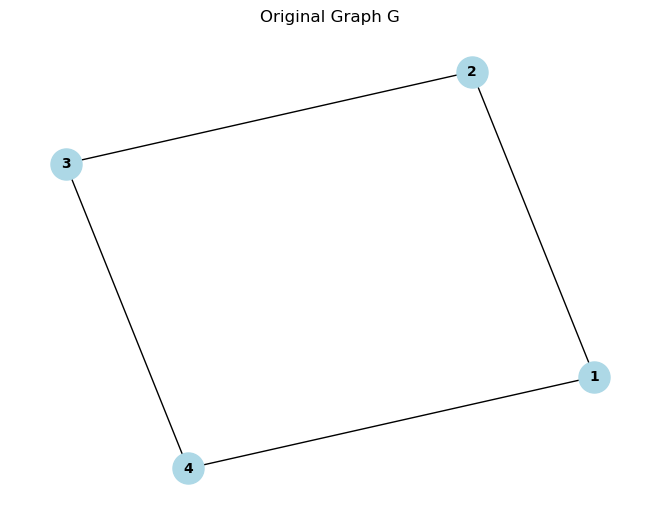

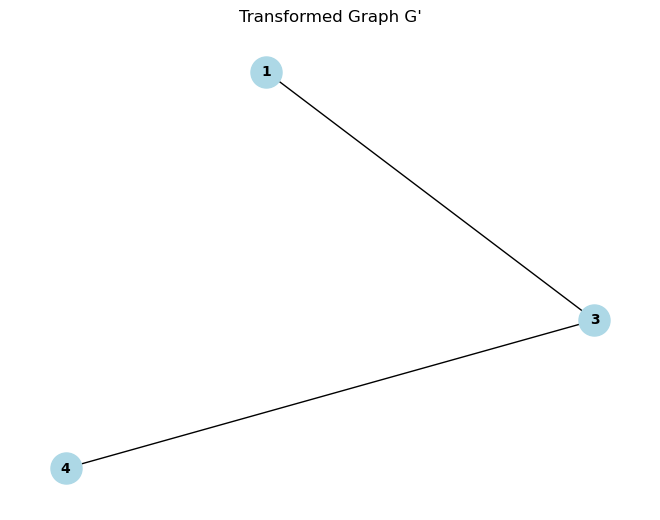

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a function to visualize the graph
def plot_graph(G, title="Graph"):
    """Plots the graph using matplotlib"""
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
    plt.title(title)
    plt.show()

# Step 2: Function to create the initial graph G
def create_initial_graph():
    G = nx.Graph()
    # Add nodes and edges
    G.add_edges_from([(1, 2), (2, 3), (3, 4), (1, 4)])
    return G

# Step 3: Function to create the rule with LHS and RHS
def create_rule():
    # Left Hand Side (LHS)
    LHS = nx.Graph()
    LHS.add_edges_from([(1, 2), (2, 3)])
    
    # Right Hand Side (RHS)
    RHS = nx.Graph()
    RHS.add_edges_from([(1, 3), (3, 4)])
    
    return LHS, RHS

# Step 4: Function to find a subgraph homomorphism
def find_subgraph_homomorphism(G, LHS):
    """
    Find a homomorphism of LHS in graph G. This checks for the structure match.
    Returns the mapping of LHS nodes to G nodes if a homomorphism exists, else None.
    """
    # Try all possible mappings of LHS nodes to nodes in G
    for mapping in nx.algorithms.isomorphism.GraphMatcher(G, LHS).subgraph_isomorphisms_iter():
        # Check if the mapping respects edge connections
        valid_mapping = True
        for node_lhs, node_g in mapping.items():
            # Ensure that edges in the LHS map correctly to edges in G
            for neighbor in LHS.neighbors(node_lhs):
                if neighbor not in mapping:
                    valid_mapping = False
                    break
                if not G.has_edge(node_g, mapping[neighbor]):
                    valid_mapping = False
                    break
            if not valid_mapping:
                break
        if valid_mapping:
            return mapping  # Return valid mapping if found
    return None

# Step 5: Apply the Double Pushout (DPO) transformation
def apply_dpo(G, LHS, RHS):
    """
    Applies the Double Pushout (DPO) rule to the graph G, replacing the LHS with the RHS.
    """
    # Find the subgraph homomorphism for the LHS
    homomorphism = find_subgraph_homomorphism(G, LHS)
    
    if homomorphism is None:
        print("No matching subgraph found.")
        return G
    
    # Step 5.1: Remove the LHS from G
    nodes_to_remove = list(homomorphism.values())
    G.remove_nodes_from(nodes_to_remove)
    
    # Step 5.2: Add the RHS to G
    # We will map the nodes of the RHS to the nodes in G according to the homomorphism
    rhs_node_mapping = {node: homomorphism[node] for node in LHS.nodes() if node in homomorphism}
    
    # Map edges of the RHS to G using the node mapping
    for edge in RHS.edges():
        # Map edge from RHS to corresponding nodes in G
        mapped_edge = (rhs_node_mapping.get(edge[0], edge[0]), rhs_node_mapping.get(edge[1], edge[1]))
        G.add_edge(*mapped_edge)
    
    return G

# Example usage of DPO
def main():
    # Create the graph G
    G = create_initial_graph()
    
    # Create the LHS and RHS rule
    LHS, RHS = create_rule()
    
    # Plot the initial graph
    plot_graph(G, "Original Graph G")
    
    # Apply the DPO transformation
    G_transformed = apply_dpo(G, LHS, RHS)
    
    # Plot the transformed graph
    plot_graph(G_transformed, "Transformed Graph G'")

# Run the DPO algorithm
main()
